## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET (LATEST VERSION - 07/IV)

In [1]:
import pandas as pd
import requests
import datetime
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
#This part is for daily update the dataset.
today = datetime.now()
today = today.strftime('%Y-%m-%d')

yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

try: 
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{today}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    
except:    
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
        
print('Dataset is ready.')

#Data Wrangling
df_domain.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold','Country_Code','Population']

df_domain.drop('Day',1,inplace=True)
df_domain.drop('Month',1,inplace=True)
df_domain.drop('Year',1,inplace=True)
df_domain.drop('Countries and territories',1,inplace=True)
df_domain.drop('Country_Code',1,inplace=True)
df_domain.drop('Population',1,inplace=True)
df_NL = df_domain[df_domain['Geold'] == 'NL']
df_NL.drop('Geold',1,inplace=True)
df_NL.drop(df_NL.tail(1).index,inplace=True) # drop last row 31-12-2019
#df_NL.set_index(pd.DatetimeIndex(df_NL['dateRep']), inplace=True)
df_NL.loc[:, 'Case_Fatality_Ratio'] =df_NL['Deaths']/df_NL.Cases

df_NL.head(10)


Dataset is ready.


,Cases,Deaths,Case_Fatality_Ratio
dateRep,,,
2020-04-07,952,101,0.106092
2020-04-06,1224,115,0.093954
2020-04-05,904,164,0.181416
2020-04-04,1026,148,0.144250
2020-04-03,1083,166,0.153278
2020-04-02,1019,134,0.131501
2020-04-01,845,175,0.207101
2020-03-31,884,93,0.105204
2020-03-30,1104,132,0.119565


In [3]:
df_NL.tail(10)

,Cases,Deaths
dateRep,,
2020-01-10,0,0
2020-01-09,0,0
2020-01-08,0,0
2020-01-07,0,0
2020-01-06,0,0
2020-01-05,0,0
2020-01-04,0,0
2020-01-03,0,0
2020-01-02,0,0


In [4]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
df_NL.shape

(98, 3)

In [48]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2020-04-07 to 2020-01-01
Data columns (total 3 columns):
Cases                  98 non-null int64
Deaths                 98 non-null int64
Case_Fatality_Ratio    40 non-null float64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [49]:
df_NL.isnull().sum()

Cases                   0
Deaths                  0
Case_Fatality_Ratio    58
dtype: int64

In [50]:
df_NL.describe()

,Cases,Deaths,Case_Fatality_Ratio
count,98.000000,98.000000,40.000000
mean,191.867347,19.051020,0.055920
std,360.922376,43.359531,0.056111
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.045308
75%,146.500000,1.750000,0.093911
max,1224.000000,175.000000,0.207101


## General Trendline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012021C55E10>,
      dtype=object)

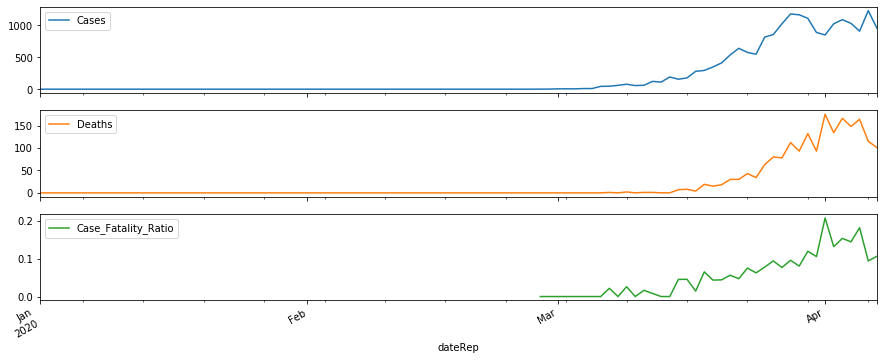

In [52]:
df_NL.plot(subplots=True, figsize=(15,6))

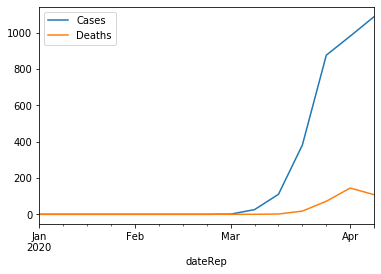

In [60]:
df_NL[['Cases','Deaths']].resample('W').mean().plot()

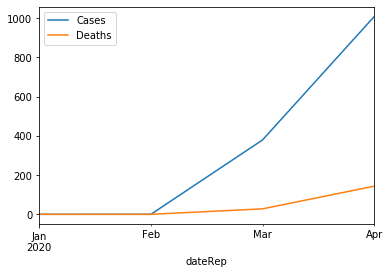

In [62]:
df_NL[['Cases','Deaths']].resample('M').mean().plot()

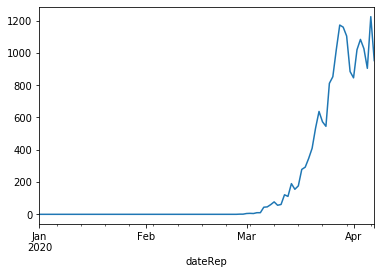

In [63]:
df_NL['Cases'].resample('D').mean().plot()

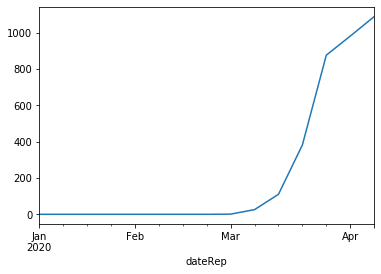

In [64]:
df_NL['Cases'].resample('W').mean().plot()

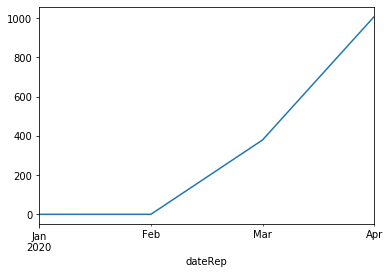

In [65]:
df_NL['Cases'].resample('M').mean().plot()

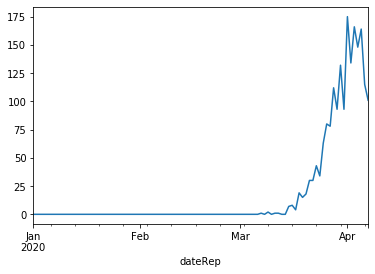

In [66]:
df_NL['Deaths'].resample('D').mean().plot()

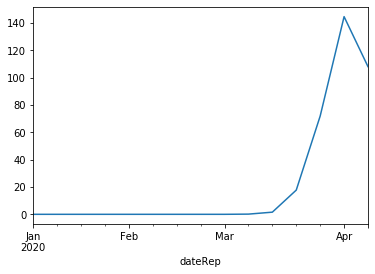

In [67]:
df_NL['Deaths'].resample('W').mean().plot()

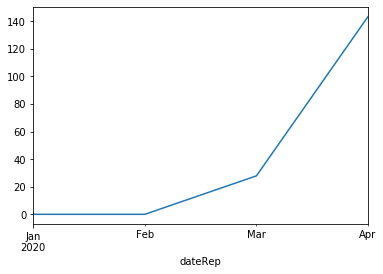

In [68]:
df_NL['Deaths'].resample('M').mean().plot()

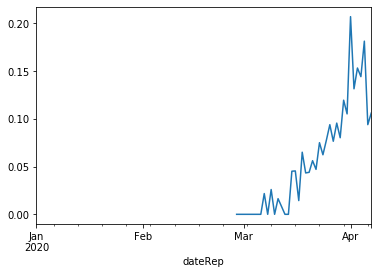

In [70]:
df_NL['Case_Fatality_Ratio'].resample('D').mean().plot()

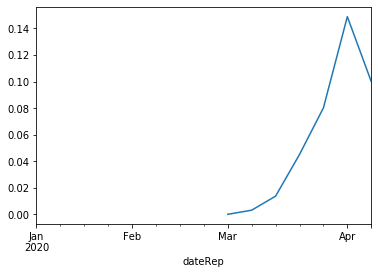

In [71]:
df_NL['Case_Fatality_Ratio'].resample('W').mean().plot()

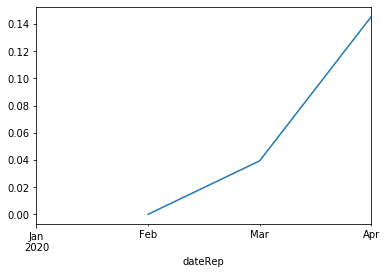

In [69]:
df_NL['Case_Fatality_Ratio'].resample('M').mean().plot()

## March Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000120220B5F98>,
      dtype=object)

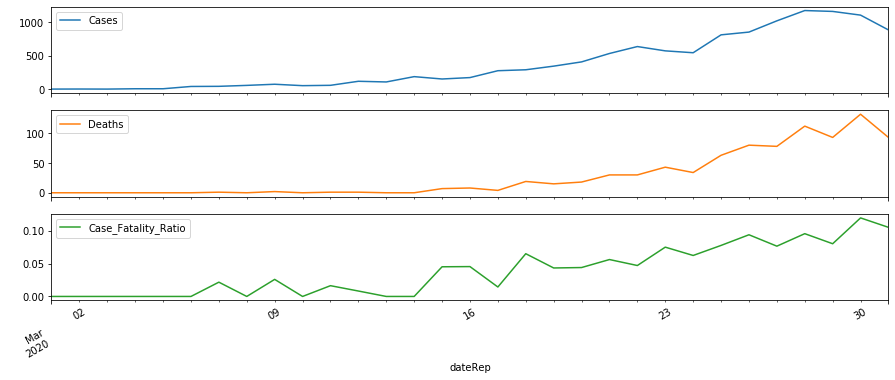

In [72]:
df_NL['2020-03'].plot(subplots=True, figsize=(15,6))

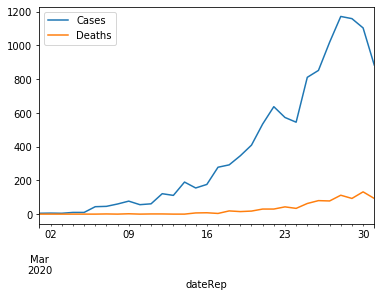

In [18]:
df_NL['2020-03'].resample('D').mean().plot()

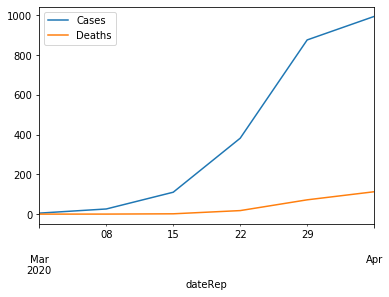

In [19]:
df_NL['2020-03'].resample('W').mean().plot()

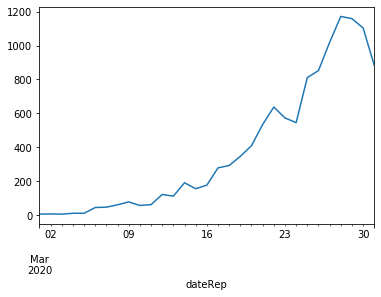

In [20]:
df_NL.Cases['2020-03'].resample('D').mean().plot()

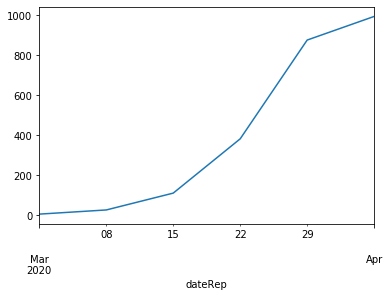

In [21]:
df_NL.Cases['2020-03'].resample('W').mean().plot()

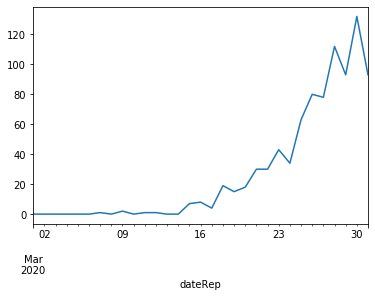

In [22]:
df_NL.Deaths['2020-03'].resample('D').mean().plot()

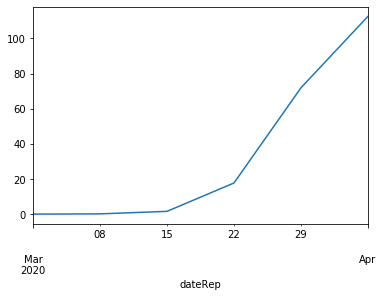

In [23]:
df_NL.Deaths['2020-03'].resample('W').mean().plot()

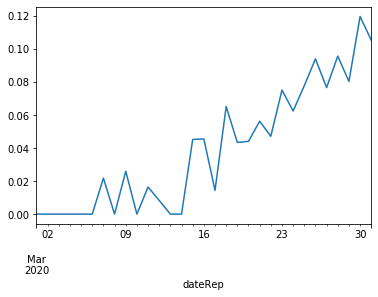

In [73]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('D').mean().plot()

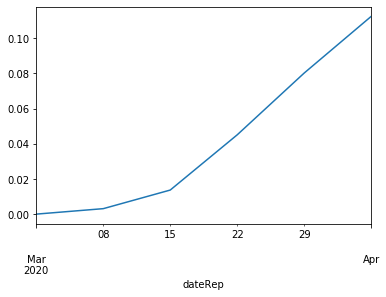

In [74]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('W').mean().plot()

## April Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001202230D518>,
      dtype=object)

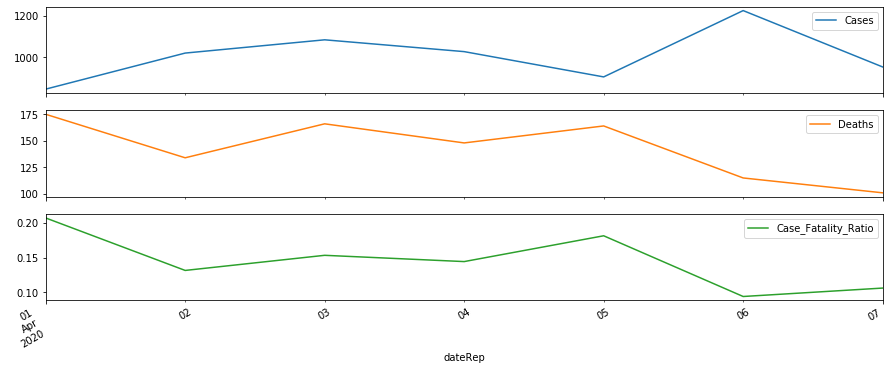

In [75]:
df_NL['2020-04'].plot(subplots=True, figsize=(15,6))

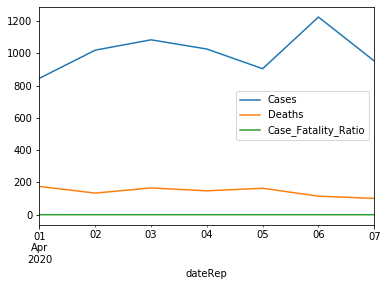

In [76]:
df_NL['2020-04'].resample('D').mean().plot()

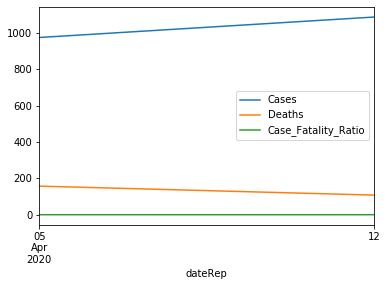

In [77]:
df_NL['2020-04'].resample('W').mean().plot()

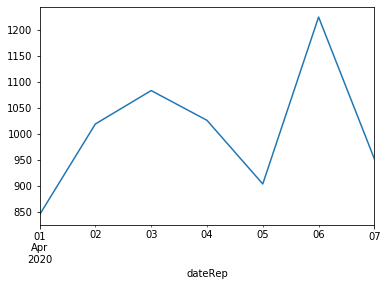

In [78]:
df_NL.Cases['2020-04'].resample('D').mean().plot()

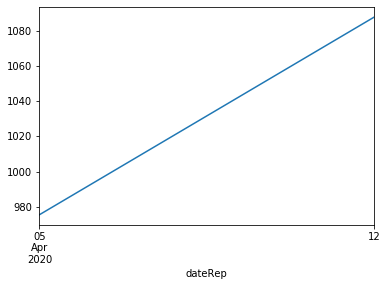

In [79]:
df_NL.Cases['2020-04'].resample('W').mean().plot()

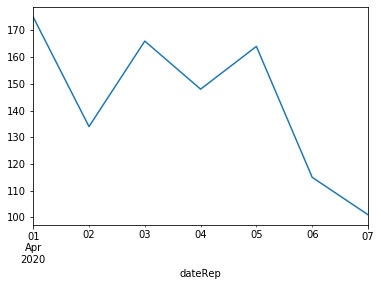

In [80]:
df_NL.Deaths['2020-04'].resample('D').mean().plot()

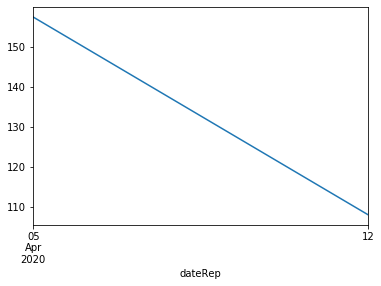

In [81]:
df_NL.Deaths['2020-04'].resample('W').mean().plot()

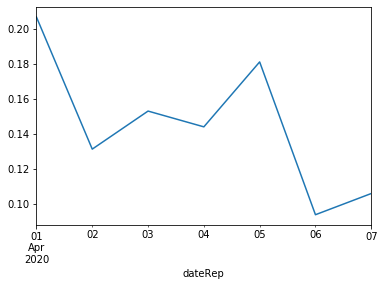

In [82]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('D').mean().plot()

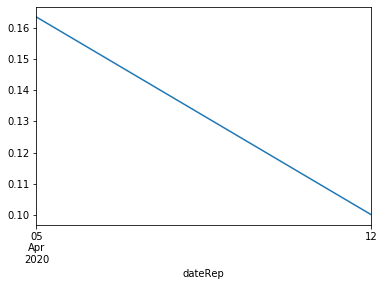

In [83]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('W').mean().plot()